thicknesses: [88.76995258 58.27430853], roughnesses: [0.53948551 5.67937605], slds: [119.02622965  57.3337726 ]


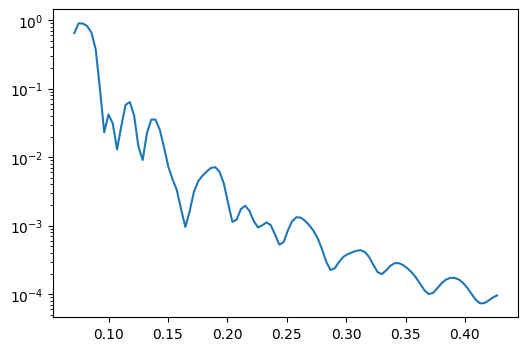

In [3]:
from model_fused import PhysicsLayer
from reflecto.simulator.simulator import XRRSimulator, tth2q_wavelen

import numpy as np
import matplotlib.pyplot as plt

wavelen: float = 1.54  # (nm)
tth_min: float = 1.0   # degree
tth_max: float = 6.0
q_min: float = tth2q_wavelen(tth_min, wavelen)  # (1/Å)
q_max: float = tth2q_wavelen(tth_max, wavelen)
q_n: int = 100
qs: np.ndarray = np.linspace(q_min, q_max, q_n)

xrr_simulator = XRRSimulator(qs, 2, 1)
thicknesses, roughnesses, slds, refl = next(xrr_simulator.make_params_refl())

print(f"thicknesses: {thicknesses}, roughnesses: {roughnesses}, slds: {slds}")

fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(qs, refl)
ax.set_yscale("log")

plt.show()

In [4]:
import torch

physics_layer = PhysicsLayer(torch.tensor(qs), 2)
thickness_est, confidence = physics_layer._your_fourier_model(qs, refl)

In [5]:
print(thickness_est, confidence)

[2.25846901 1.1292345 ] 0.7560004587113974
